In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math

In [2]:
import sys
import datagnome as dgnom
#from importlib import reload
#reload(dgnom)

# Workflow
1. Data import
1. Analyse the problem
1. Data pre-processing
1. Data cleaning
    1. Inspection
    1. Check for inconsistent or invalid data
        1. Value constraints and set membership
        1. Formating
        1. Dtypes
        1. Cross field validation
        1. Check rows for validity
    1. Handle null values
    1. Handle duplicates
    1. Handle outliers
1. Data post-processing
1. EDA

# Data import

In [65]:
wpath = "data/WineQT.csv"
df = pd.read_csv(wpath)

# Data cleaning
## Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3


In [6]:
df.describe(exclude="O")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

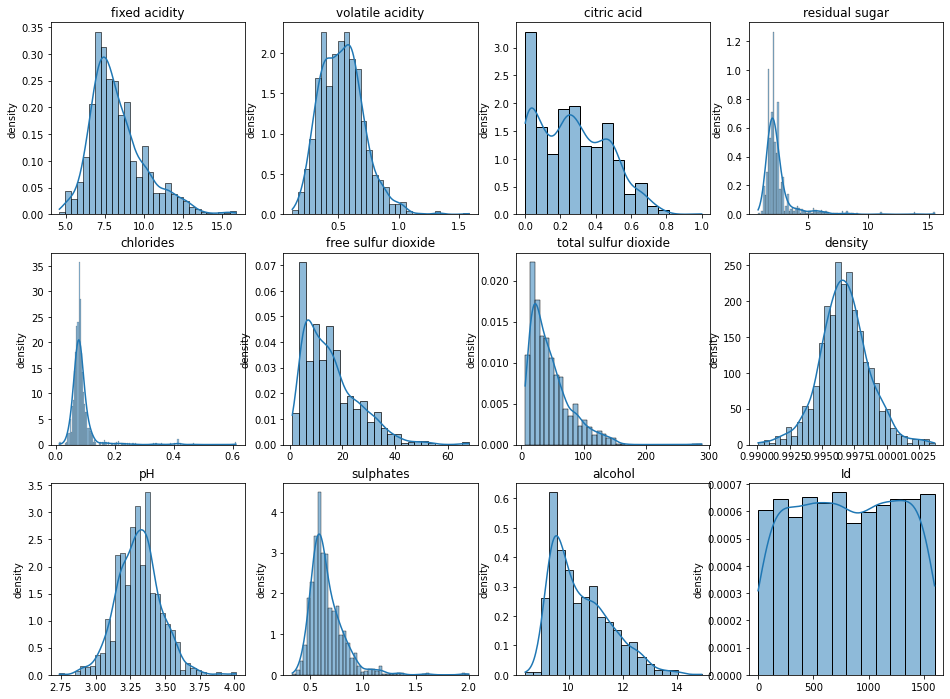

In [10]:
num_feat, cont_feat, disc_feat, cat_feat = dgnom.create_feature_lists(df)
dgnom.df_cobahiscplots(df,cont_feat,pltyp="histplot",target=False,hue=None,logs=False,kde=True,est=False,stat="density")

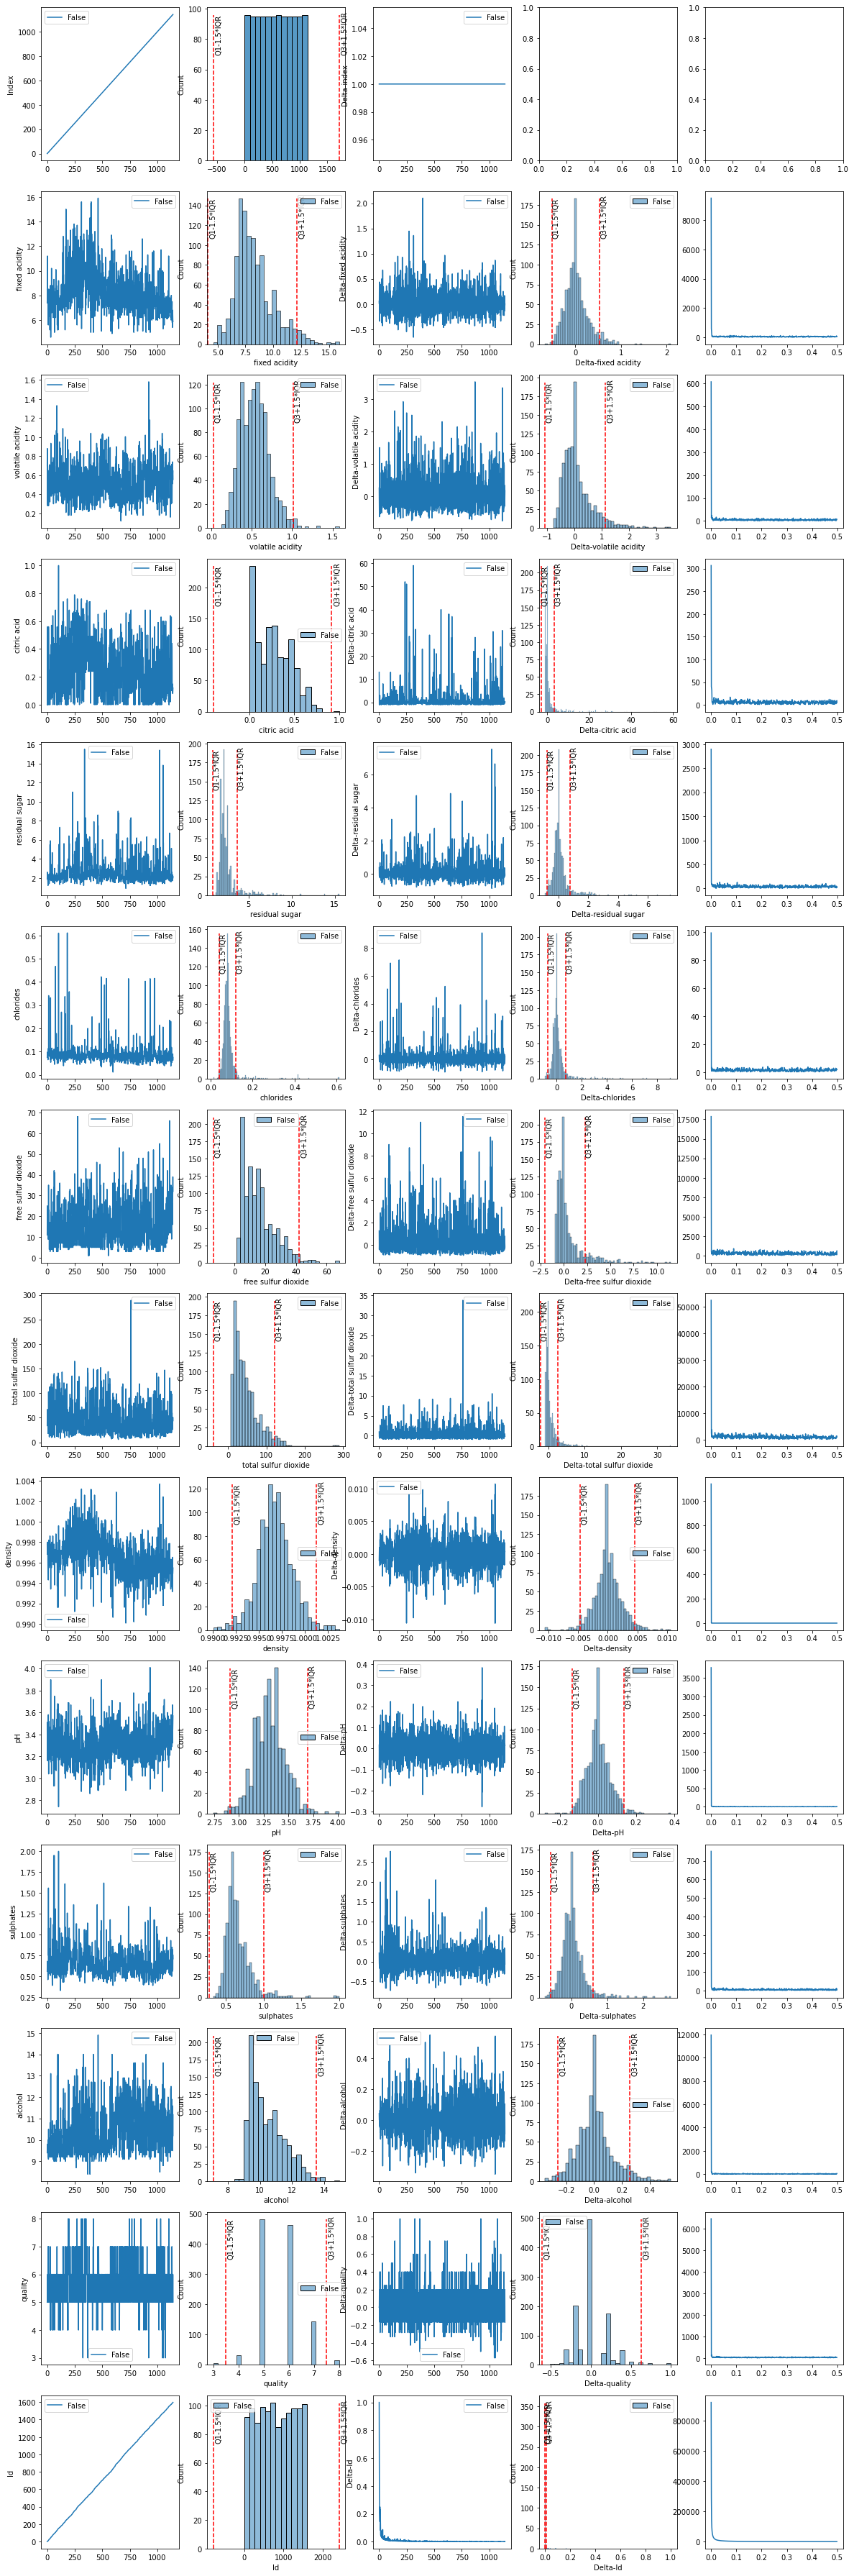

In [11]:
dgnom.df_metaplot(df,hue=False,diffrel=True)

## Check for inconsistent or invalid data

__Summary of results__
- Dtypes ok as is
- No need for cross field or cross row validation
- Neither missing values nor duplicates

### Value constraints and set membership

In [16]:
df.describe(exclude="O")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Check formating

### Change Dtypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Cross field validation

### Check rows for validity

## Handle null values

In [19]:
df.isna() # Show which cells are empty
df.isna().sum(axis=0)  # Sum  
#df["time"].isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
import missingno as msno
g = msno.matrix(df)

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.notna())
plt.show()

## Handle duplicates

In [20]:
dr = df.duplicated(keep="first").sum() # All columns included in check

if dr>0:
    print(f"The dataset has {dr} duplicated rows.")
    print(f"Removing all duplicates will reduce the dataset from {df.shape[0]} to {df.shape[0]-dr} rows")
    print(df[df.duplicated()])
else:
    print("The dataset has 0 duplicated rows")
    
print("\n")
for c in df.columns:
    dup = df[c].duplicated().sum()
    if dup > 0:
        print(f"Columns {c} has {dup} duplicated rows")

if dr>0:
    print("Duplicated rows:")
    df.loc[df.duplicated(keep=False)]

The dataset has 0 duplicated rows


Columns fixed acidity has 1052 duplicated rows
Columns volatile acidity has 1008 duplicated rows
Columns citric acid has 1066 duplicated rows
Columns residual sugar has 1063 duplicated rows
Columns chlorides has 1012 duplicated rows
Columns free sulfur dioxide has 1090 duplicated rows
Columns total sulfur dioxide has 1005 duplicated rows
Columns density has 755 duplicated rows
Columns pH has 1056 duplicated rows
Columns sulphates has 1054 duplicated rows
Columns alcohol has 1082 duplicated rows
Columns quality has 1137 duplicated rows


## Handle outliers

__Summary of results__
- Dtypes ok as is
- No need for cross field or cross row validation
- Neither missing values nor duplicates
- A small number of suspected outliers were removed

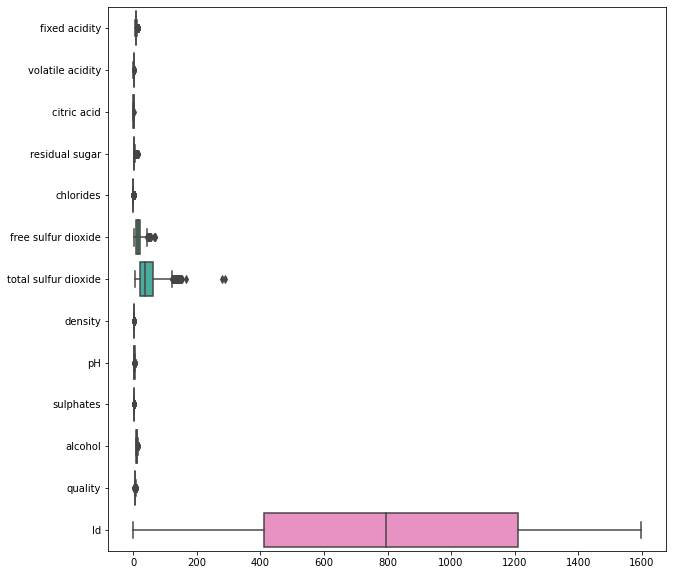

In [22]:
plt.figure(figsize=(10,10))
g = sns.boxplot(data=dgnom.df_allcatnum(df),orient="h")
#g = sns.catplot(data=df_allcatnum(df), kind="violin",orient="h")
plt.show()

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [23]:
dgnom.df_flexplot(df)

interactive(children=(IntSlider(value=6, description='dx', max=15, min=3), IntSlider(value=5, description='dy'…

In [66]:
# Drop selected index
krit1 = df["sulphates"]>1.5
krit2 = df["total sulfur dioxide"]>200
krit3 = df["chlorides"]>0.3
krit4 = df["residual sugar"]>10

inddrop = df.loc[krit1 | krit2 | krit3 | krit4].index.values
df.drop(index = inddrop,inplace=True)

# Data post-processing

In [67]:
# Reseet index
df.reset_index(drop=True,inplace=True)

# EDA
1. Description
1. Evaluate interdependence between columns
1. Correlation between columns

In [47]:
def amplt(df,var_list,xvar,kolm = 3):
    """Plot categorys"""
    rows = math.ceil(len(var_list)/kolm)
    fig, axs = plt.subplots(rows, kolm, figsize=(20,5*rows))

    for i, ax in zip(var_list,axs.flat):
        g = sns.barplot(data=df,x=xvar,y=i,ax=ax)
        ax.set(xlabel="",ylabel="",title=i)
        
    for i in axs.flat[::-1][:rows*3-len(var_list)]:
        i.set_axis_off()
    plt.show()

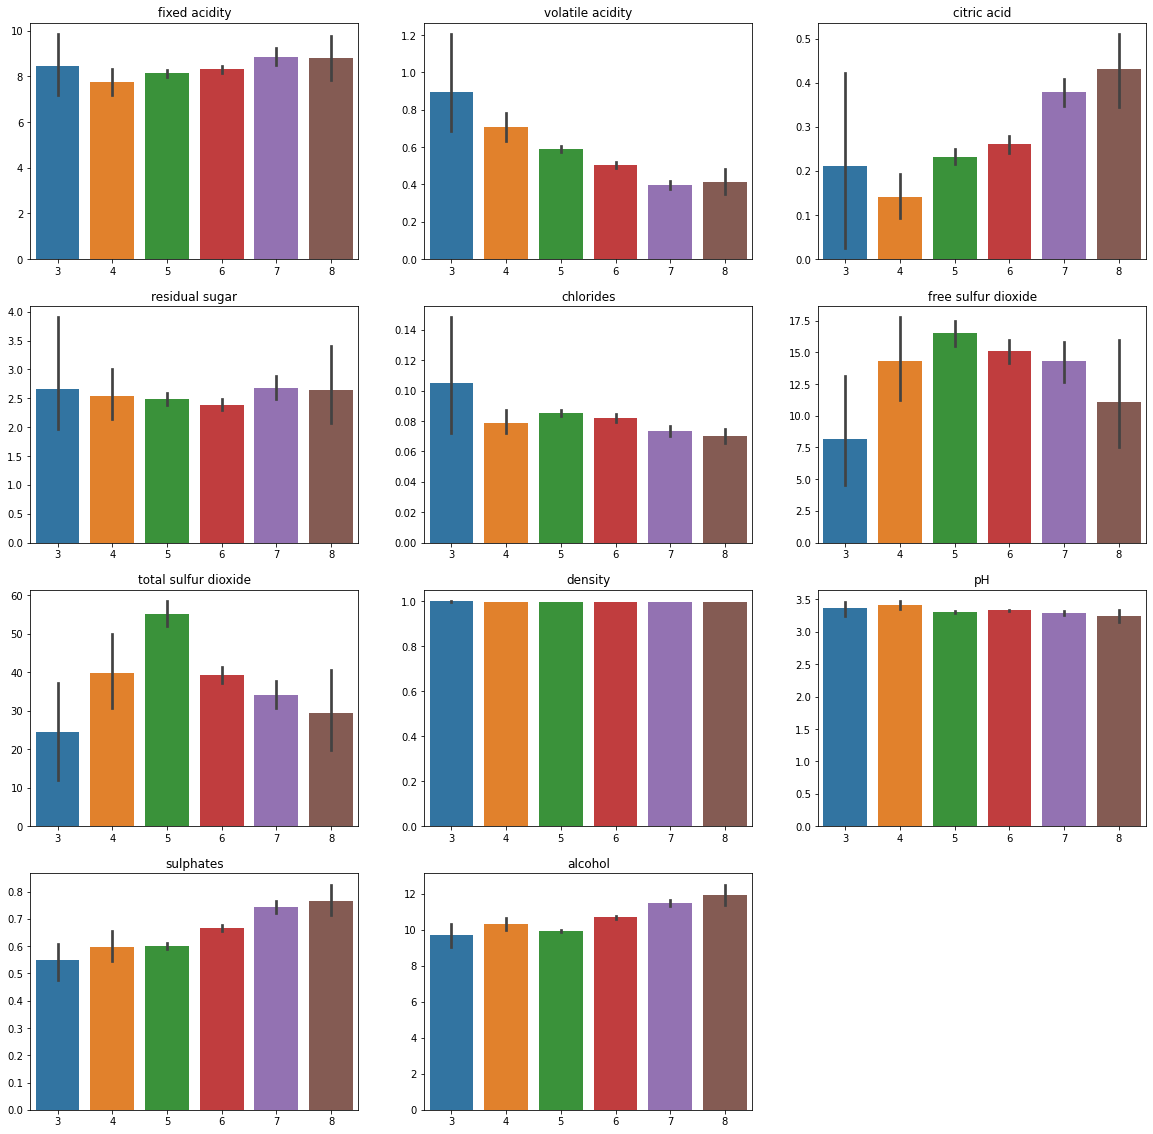

In [48]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
xvar = "quality"
amplt(df,cols,xvar,kolm = 3)

In [ ]:
df.plot(figsize=[15,15],fontsize=12, subplots=True, layout=(5,3),kind="line") # kind="hist"
plt.show

In [49]:
num_feat, cont_feat, disc_feat, cat_feat = dgnom.create_feature_lists(df)

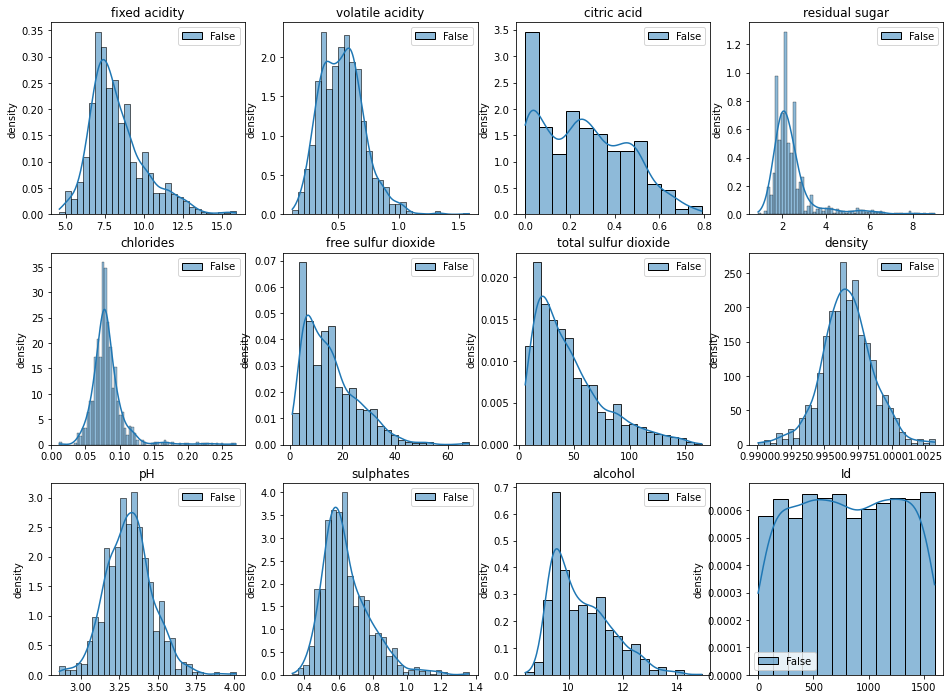

In [54]:
dgnom.df_cobahiscplots(df,cont_feat,pltyp="histplot",target="quality",hue=False,logs=False,kde=True,est=False,stat="density")

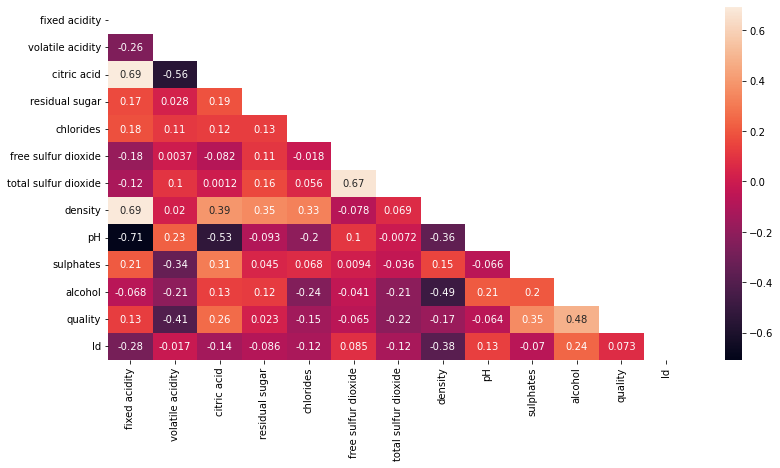

In [52]:
dgnom.df_corrbas(df,col=False,method="pearson")
#dgnom.df_corrphik(df,col=False)

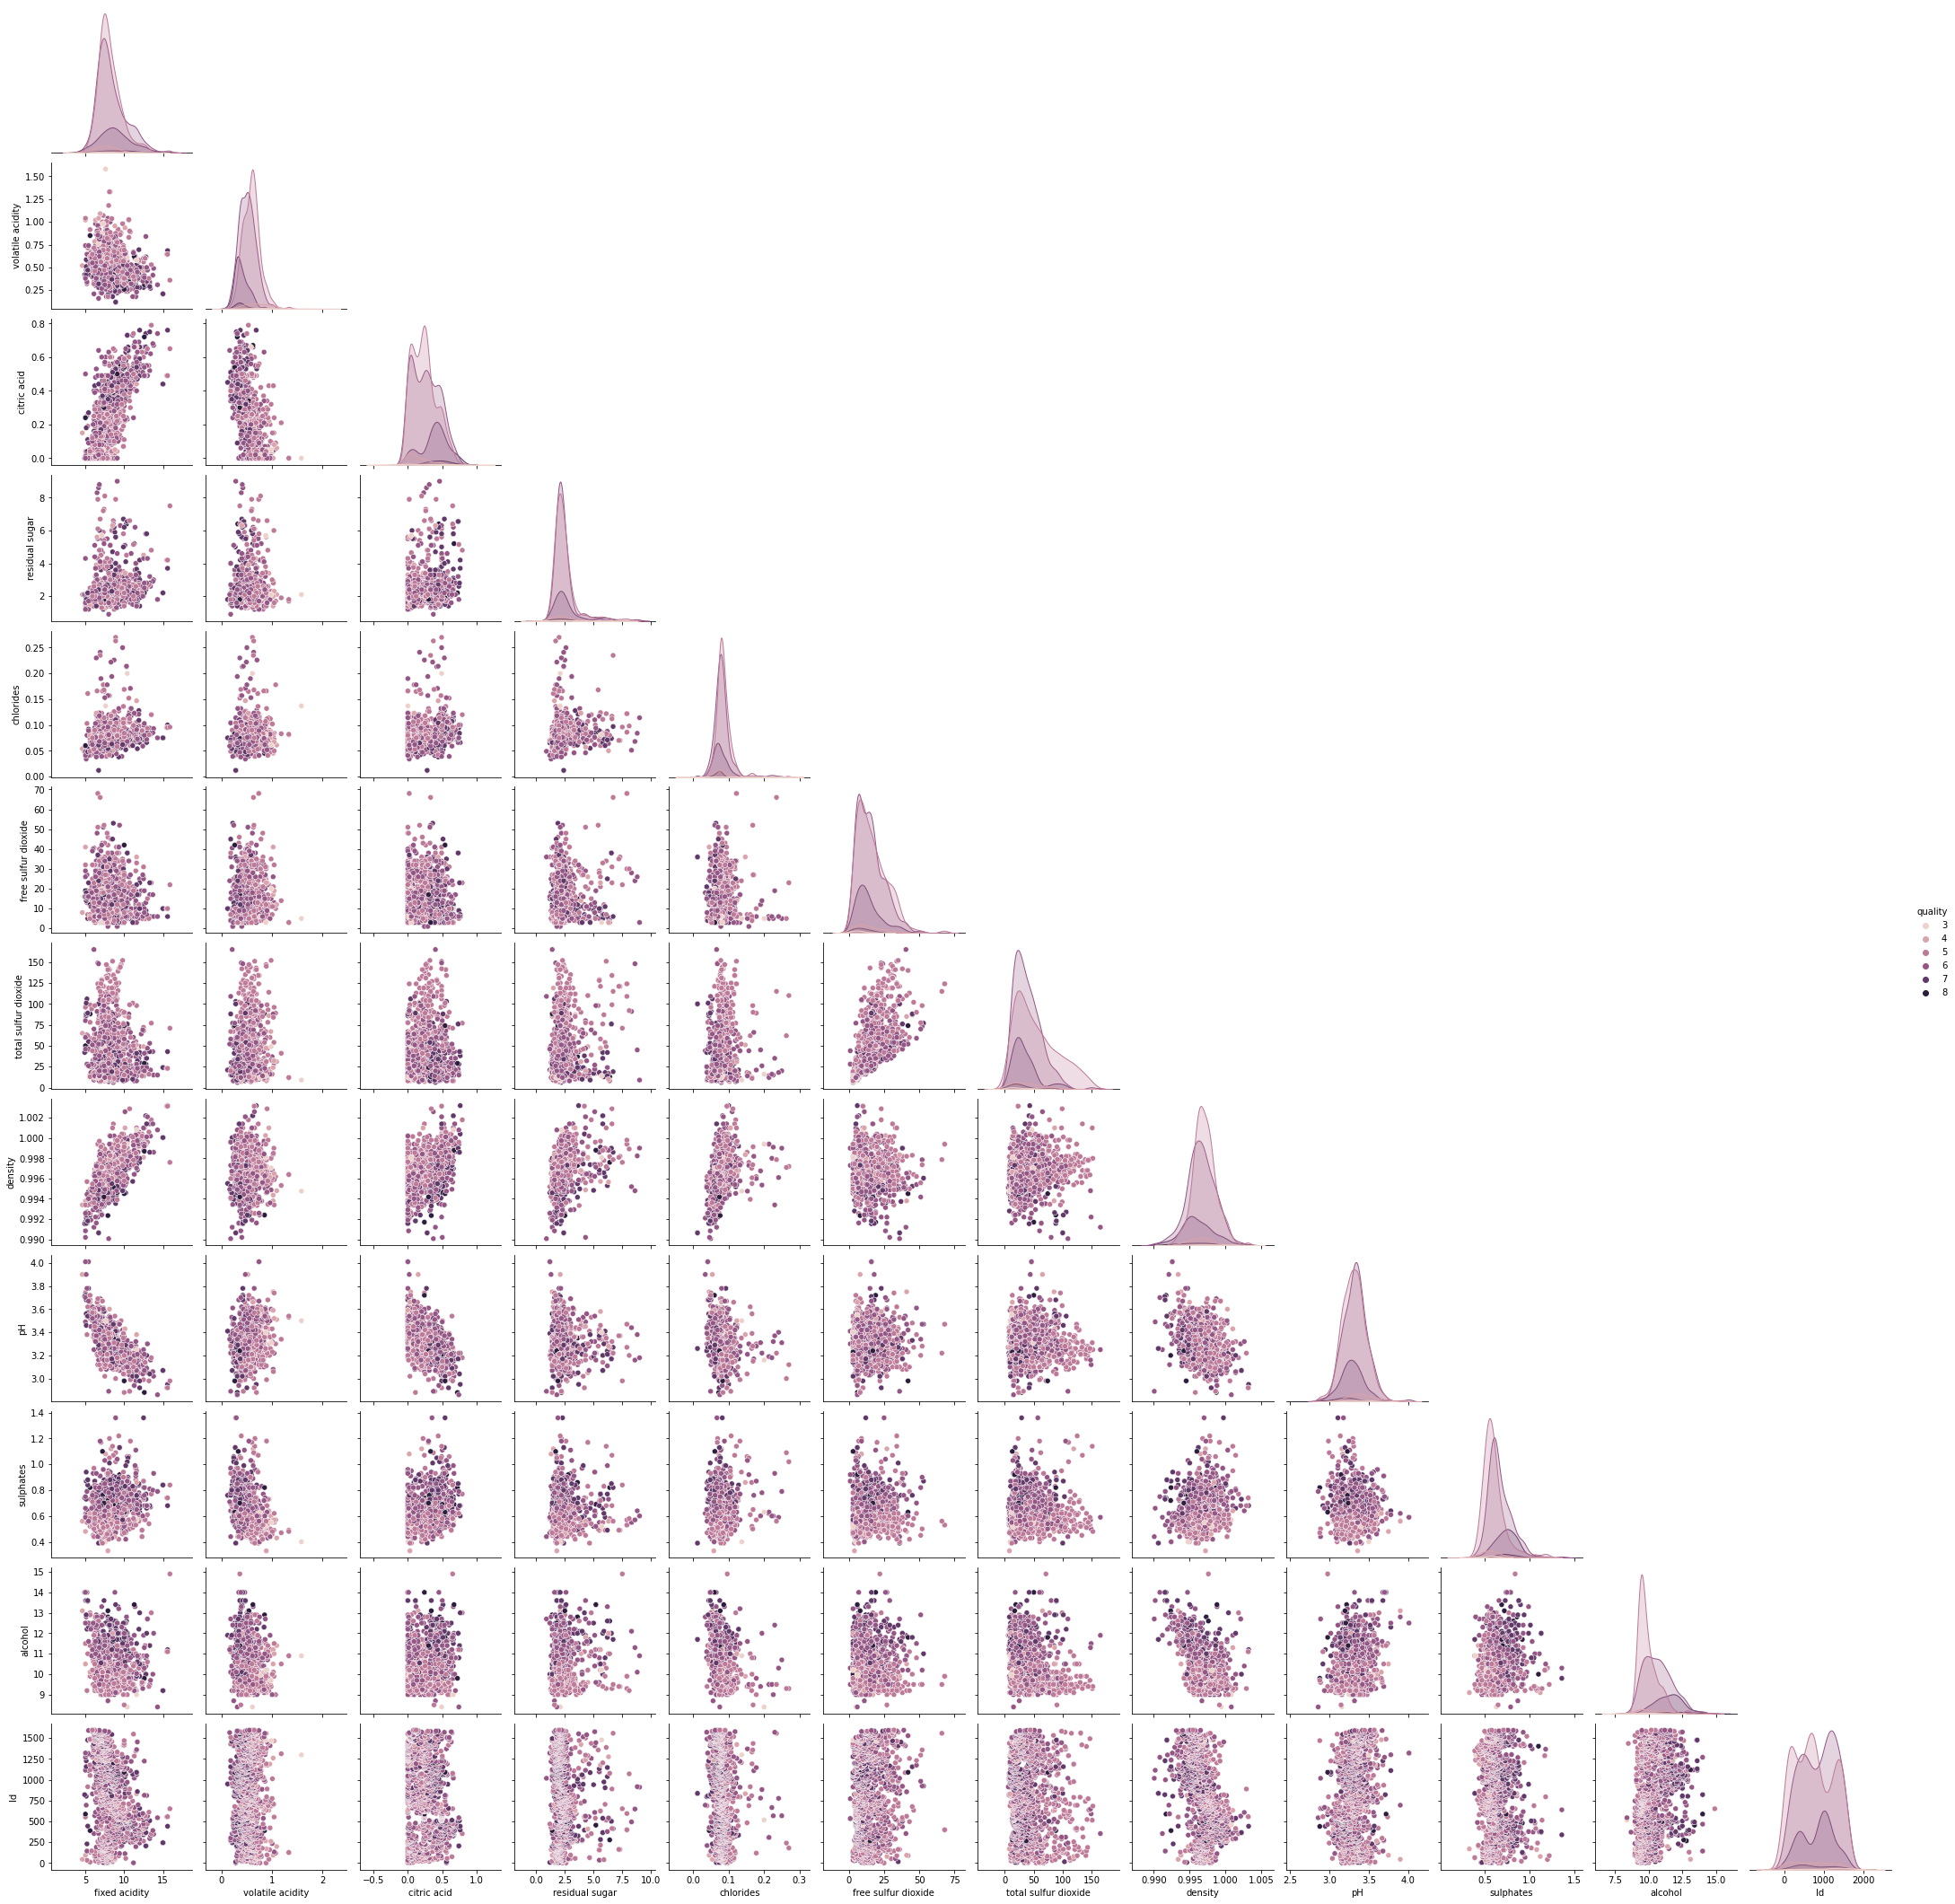

In [58]:
sns.pairplot(df,hue="quality", corner=True)
plt.show()df.to_csv('wine_cleaned.csv',index = False)

# Check export
#dfny = pd.read_csv("wine_cleaned.csv")
#dfny.info()

# Data export
## Save and import data

In [68]:
df.to_csv('wine_cleaned.csv',index = False)

In [60]:
# Check export
#dfny = pd.read_csv("wine_cleaned.csv")
#dfny.info()